In [4]:
!pip install pyarrow


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\TechCare\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# 1. PRODUCT FEATURES


## 1.1 Import data and change the column's name

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Install pyarrow package
%pip install pyarrow

# Load the Parquet file into a DataFrame using pyarrow engine
file_path = r"C:\Users\TechCare\OneDrive - HvA\Master - Block 1\Business Statistics\Team assignment\Tao Yin_Item_features.parquet"
df_taoyin_features = pd.read_parquet(file_path)


   ---------------------------------------- 0.0/25.1 MB ? eta -:--:--
   ----- ---------------------------------- 3.1/25.1 MB 15.3 MB/s eta 0:00:02
   ---------- ----------------------------- 6.3/25.1 MB 15.4 MB/s eta 0:00:02
   --------------- ------------------------ 9.7/25.1 MB 15.5 MB/s eta 0:00:01
   -------------------- ------------------- 12.8/25.1 MB 15.2 MB/s eta 0:00:01
   ------------------------- -------------- 16.0/25.1 MB 15.0 MB/s eta 0:00:01
   ------------------------------ --------- 19.4/25.1 MB 15.5 MB/s eta 0:00:01
   ----------------------------------- ---- 22.5/25.1 MB 15.3 MB/s eta 0:00:01
   ---------------------------------------  24.9/25.1 MB 15.2 MB/s eta 0:00:01
   ---------------------------------------- 25.1/25.1 MB 13.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
#change the name of column
df_taoyin_features.rename(columns={"statistiek_hoofdgroep": "main_group", "statistiek_subgroep": "sub_group", "Articlenr": "articlenr"}, inplace=True)
df_taoyin_features.head(5)

,articlenr,EF000001,EF000002,EF000003,EF000004,EF000005,EF000006,EF000007,EF000008,EF000010,...,EFDE0031,EFDE0032,EFFR0001,EFFR0002,EFNL0014,EFUK0017,EFUK0019,ETIM,main_group,sub_group
0,34581962,6.0,NaN,NaN,NaN,NaN,NaN,NaN,6.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,A,x1
1,35764300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,A,x2
2,35823358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,A,x3
3,28405226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,321.0,B,y1
4,35622440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,C,y2


### Dataset
- articlenr: product article number 
- From EF000001 to EFUK0019: Features of each products that can have such as colors, texture,...
- ETIM: the score of each article number 
- Main_group: group family: A, B, C, D, E, F, G, H
- Sub_group: small group in each group family

## Clean data and Descriptive analyses:  

In [10]:
#replace NaN value:
df_new_taoyin_features = df_taoyin_features.fillna(0)
df_new_taoyin_features.head()

,articlenr,EF000001,EF000002,EF000003,EF000004,EF000005,EF000006,EF000007,EF000008,EF000010,...,EFDE0031,EFDE0032,EFFR0001,EFFR0002,EFNL0014,EFUK0017,EFUK0019,ETIM,main_group,sub_group
0,34581962,6.0,0.0,0.0,0.0,0.0,0.0,0.0,6.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,A,x1
1,35764300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,A,x2
2,35823358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,A,x3
3,28405226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,321.0,B,y1
4,35622440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,C,y2


In [12]:
#Reading the data 
TY_new_length = len(df_new_taoyin_features)
print("The length of the dataframe is: ", TY_new_length)

The length of the dataframe is:  168939


In [13]:
#information about the dataframe:
df_new_taoyin_features.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168939 entries, 0 to 168938
Columns: 4028 entries, articlenr to sub_group
dtypes: float64(4025), int64(1), object(2)
memory usage: 5.1+ GB


In [14]:
#the duplicate in TaoYin_features: - by rows:
count_duplicate = df_new_taoyin_features.duplicated().sum()
print(count_duplicate)

258


In [15]:
#the percentage of duplicate:
#Total number of rows in the Dataset:
total_rows = df_new_taoyin_features.shape[0]

#calculate the percentage of duplicate row:
percentage_duplicate = (count_duplicate / total_rows) * 100
#print percentage:
print(percentage_duplicate)

0.15271784490259796


            articlenr
main_group           
A               39442
B               13280
C              100049
D                7955
E                1354
F                5151
G                 434
H                1220
I                  54


<Figure size 1000x600 with 0 Axes>

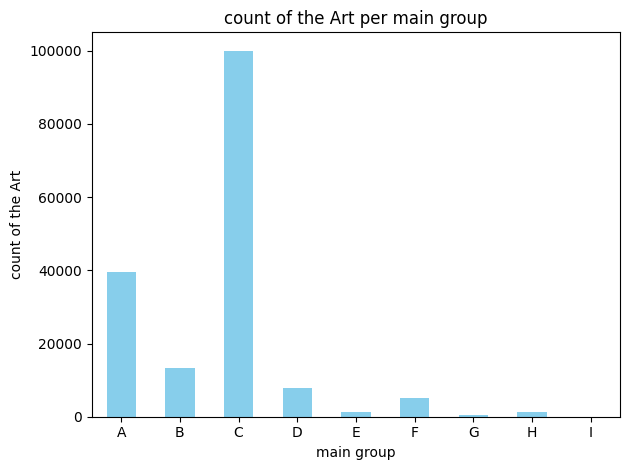

In [17]:
#pivot_table_main_group:
pivot_groups = df_taoyin_features.pivot_table(index= ["main_group"], values = ["articlenr"], aggfunc= "count")
print(pivot_groups)
#draw the bar chart:
plt.figure(figsize= (10,6))
pivot_groups.plot(kind= "bar", legend=False, color = 'skyblue')
#name of the chart
plt.title("count of the Art per main group")
plt.ylabel("count of the Art")
plt.xlabel("main group")
plt.xticks(rotation = 0)
plt.tight_layout()

#show the bar chart
plt.show()


In [ ]:
pivot_subgroup = df_taoyin_features.pivot_table(index= ["main_group", "sub_group"], values = ["Articlenr"], aggfunc= "count")
#tranfer to dataframe:
df_pivot_subgroup = pivot_subgroup.reset_index()
print(df_pivot_subgroup)

   main_group sub_group  Articlenr
0           A        p5         21
1           A        s4        362
2           A        u1      17599
3           A        u3      13143
4           A        v1       1941
5           A        x1       4169
6           A        x2       1295
7           A        x3        912
8           B        q2         52
9           B        r1       1844
10          B        v2          2
11          B        v3       1190
12          B        w3       1482
13          B        x4         68
14          B        y1       8434
15          B        y4        208
16          C        t4        699
17          C        u2      27150
18          C        u4        573
19          C        y2      14979
20          C        y3      37351
21          C        z1       9177
22          C        z2       8602
23          C        z4       1518
24          D        r2        956
25          D        s1       1059
26          D        z3       5940
27          E       

# TAO YIN TRANSACTION


## IMPPORT DATA


In [79]:
#load the parquet file - TaoYin transaction:
import pandas as pd
file_path_2= r"C:\Users\TechCare\OneDrive - HvA\Master - Block 1\Business Statistics\Team assignment\TaoYin_User_Transactions_v2.parquet"
df_taoyin_transaction = pd.read_parquet(file_path_2)
#display the dataset
df_taoyin_transaction.head()

,customer,invoice,invoice_date,articlenr,volume,sum1,sum2,postcode_delivery,postcode_customer,channel
0,2284,1187467,2020-01-02,32879960,24,343.73,362.30,80413,80413,Tel 86041
1,2284,1187467,2020-01-02,32879962,60,1067.64,1119.96,80413,80413,Tel 86041
2,2284,1187467,2020-01-02,32841810,120,2214.00,2408.40,80413,80413,Tel 86041
3,1704,1191447,2020-01-17,36866802,1,21.52,19.32,81724,81724,OTC 81812
4,45,1187691,2020-01-03,34360272,4,28.91,28.49,81796,81796,Web Order


### Data information:
- customer: the customer ID
- invoice: invoice ID
- invoice_date: the date of invoice
- articlenr: article number
- volume: the quality of each product that Customer buy
- Sum1 -> gross_sale: the total sale without discount
- Sum2 -> net_sale: the total sale with discount
- postcode_delivery: the location that customer use to receive order
- postcode_customer: the location of customer
- channel: a list of channel customer can buy


In [ ]:
#change the name of column:
df_taoyin_transaction.rename(columns={"sum1": "product_cost", "sum2": "net_sale"}, inplace=True)

In [81]:
df_taoyin_transaction.head()

,customer,invoice,invoice_date,articlenr,volume,gross_sale,net_sale,postcode_delivery,postcode_customer,channel
0,2284,1187467,2020-01-02,32879960,24,343.73,362.30,80413,80413,Tel 86041
1,2284,1187467,2020-01-02,32879962,60,1067.64,1119.96,80413,80413,Tel 86041
2,2284,1187467,2020-01-02,32841810,120,2214.00,2408.40,80413,80413,Tel 86041
3,1704,1191447,2020-01-17,36866802,1,21.52,19.32,81724,81724,OTC 81812
4,45,1187691,2020-01-03,34360272,4,28.91,28.49,81796,81796,Web Order


In [82]:
#information about the dataframe:
df_taoyin_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492731 entries, 0 to 492730
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   customer           492731 non-null  int64         
 1   invoice            492731 non-null  int64         
 2   invoice_date       492731 non-null  datetime64[ns]
 3   articlenr          492731 non-null  int64         
 4   volume             492731 non-null  int64         
 5   gross_sale         492731 non-null  float64       
 6   net_sale           492731 non-null  float64       
 7   postcode_delivery  492731 non-null  int64         
 8   postcode_customer  492731 non-null  int64         
 9   channel            492731 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(6), object(1)
memory usage: 37.6+ MB


In [83]:
#calculate the percentage of missing value in the dataset:
#count the missing value in the dataset:
missing_value = df_taoyin_transaction.isnull().sum()
print(missing_value)

customer             0
invoice              0
invoice_date         0
articlenr            0
volume               0
gross_sale           0
net_sale             0
postcode_delivery    0
postcode_customer    0
channel              0
dtype: int64


In [ ]:
#The table of sum per year
#spin the year from the date column:
df_taoyin_transaction["year"] = df_taoyin_transaction["invoice_date"].dt.year
#the dataset after adding the year column:
sum_year = df_taoyin_transaction.pivot_table(index= ["year"], values = ["product_cost"], aggfunc= "sum")
#display the dataset:
sum_year.head()

,gross_sale
year,
2020,13505720.30
2021,65291275.72
2022,14476351.80
2023,13679932.56
2024,7558821.63


<Figure size 500x250 with 0 Axes>

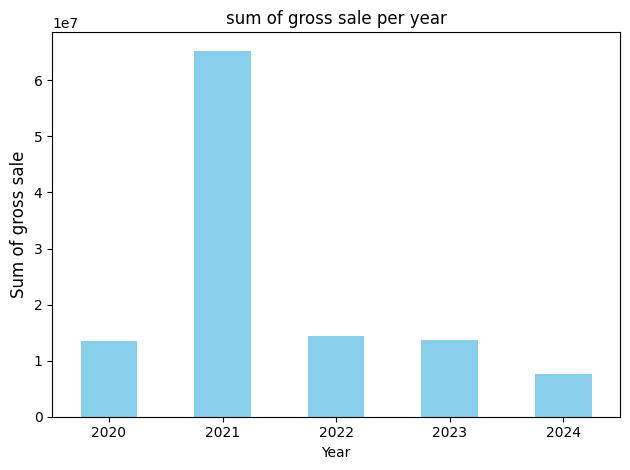

In [86]:
#draw the bar chart about the sum_year:
plt.figure(figsize= (5, 2.5), dpi= 100)
sum_year.plot(kind= "bar", legend=False, color = 'skyblue')
#name of the chart
plt.title("sum of gross sale per year")
plt.ylabel("Sum of gross sale", fontsize = 12)
plt.xlabel("Year")
plt.xticks(rotation = 0)
plt.tight_layout()
#show the bar chart
plt.show()


Based on the graph, we observe that during 2021, the sum of products increased dramatically due to COVID-19, but dropped significantly afterward.

- **R1:** Analyzing the entire timeframe includes numerous outliers, which could distort insights and affect other variables.
  
- **R2:** Given that the project aims to identify product segments for targeted production and upselling to business customers, focusing on the post-COVID period is essential. Including the full timeframe could lead to skewed insights and misguided decisions. For instance, while face masks saw high demand during COVID, this demand sharply declined afterward, making it an unreliable indicator for future strategy.

### CREATING PRICE_TABLE:
- Reason 1: Because in this chapter, we will find the products segment so we mainly use the column of articlenr, volumn, and product_cost to create feature to indentify the product segment. So we created the new table with 3 columns: articlenr, volumn, product_cost 
- Reson 2: Based on the graph we will remain the rows has invoice date from 2022 to 2024

1. Step 1: we will drop the row during 2020 and 2021

In [87]:
#new_df with filter the row of the df_taoyin_transaction have invoice_data from 2022-01-01 to after that:
TY_2022 = df_taoyin_transaction[df_taoyin_transaction['invoice_date'] > '2022-01-01']
TY_2022.head()

,customer,invoice,invoice_date,articlenr,volume,gross_sale,net_sale,postcode_delivery,postcode_customer,channel,year
19831,1582,1369953,2022-01-06,34207712,2,11.84,11.5,84824,84824,Tel 84817,2022
19832,2256,1369969,2022-01-06,27200342,3050,1342.00,1707.7,85084,85084,Tel 84817,2022
19833,2256,1369969,2022-01-06,37069504,300,1725.00,2031.0,85084,85084,Tel 84817,2022
19834,727,1369982,2022-01-06,34659976,20,1797.00,4113.0,85341,85341,Tel 85705,2022
19835,727,1369982,2022-01-06,34605460,20,129.60,279.9,85341,85341,Tel 85705,2022


In [88]:
#print the number of rows removed after using the filter:
print("the number of rows removed after using the filter: ", len(df_taoyin_transaction) - len(TY_2022))

the number of rows removed after using the filter:  242248


2. Step 2: we created the product price dataframe

In [ ]:
#create new df_price with the column: Articlenr, volumn, sum1, volumn
df_price = TY_2022[["articlenr", "volume", "product_cost"]]
df_price.head()

,articlenr,volume,gross_sale
19831,34207712,2,11.84
19832,27200342,3050,1342.00
19833,37069504,300,1725.00
19834,34659976,20,1797.00
19835,34605460,20,129.60


In [90]:
#checking the unique in articlenr:
if len(df_price["articlenr"].unique()) == len(df_price):
    print("The article numbers are unique, we don't need to aggregate")
else:
    print("The article numbers are not unique, we need to aggregate")

The article numbers are not unique, we need to aggregate


In [ ]:
#a new dataframe with the aggregation of the product_cost and volume by articlenr:
df_price_agg = df_price.groupby("articlenr").agg({"product_cost": "sum", "volume": "sum"}).reset_index()
df_price_agg.head()


,articlenr,gross_sale,volume
0,21287380,515.00,1
1,21960000,20592.25,2579
2,21960002,165.09,19
3,21960004,1719.73,2004
4,21960008,687.25,775


In [ ]:
#calculate the average price of each article:
df_price_agg["price"] = round(df_price_agg["product_cost"] / df_price_agg["volume"],2)
df_price_agg.head()

,articlenr,gross_sale,volume,price
0,21287380,515.00,1,515.00
1,21960000,20592.25,2579,7.98
2,21960002,165.09,19,8.69
3,21960004,1719.73,2004,0.86
4,21960008,687.25,775,0.89


In [99]:
#arrage the column in the df_price_agg by price in descending order:
df_price_agg = df_price_agg.sort_values(by = "price", ascending= False)
df_price_agg.head()

,articlenr,gross_sale,volume,price
746,24558112,28553.40,3,9517.80
745,24558110,28091.19,3,9363.73
54,24498446,4677.04,1,4677.04
779,24559600,4302.87,1,4302.87
53,24498440,4139.33,1,4139.33


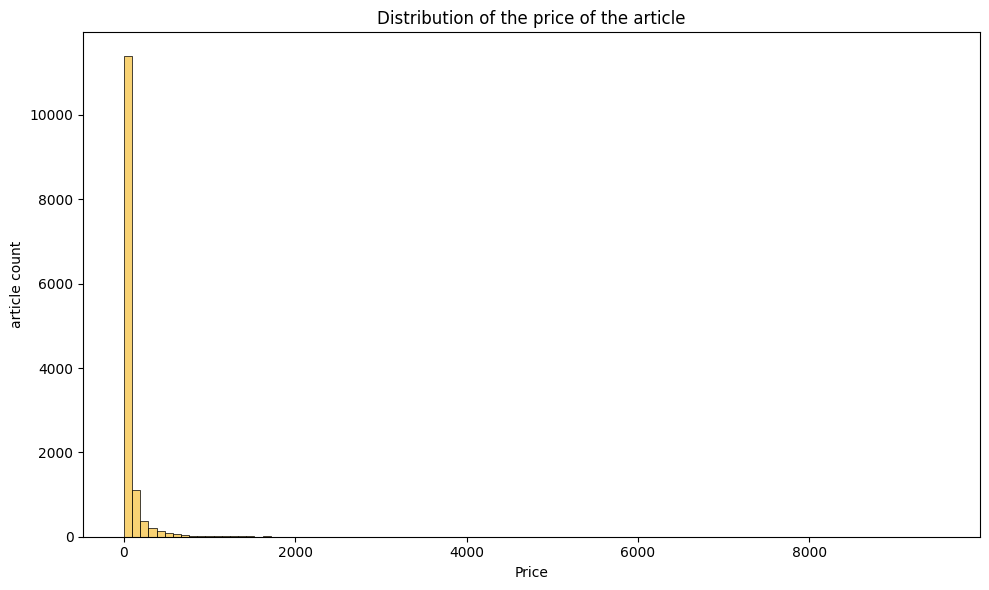

In [ ]:
#plot the price of the article:
plt.figure(figsize= (10,6), dpi= 100)
sns.histplot(df_price_agg["price"], bins = 100, color = '#f6c345')
plt.title("Distribution of the price of the article")
plt.xlabel("Price")
plt.ylabel("article count")
plt.tight_layout()
plt.show()

HISTOGRAM OF VOULUME

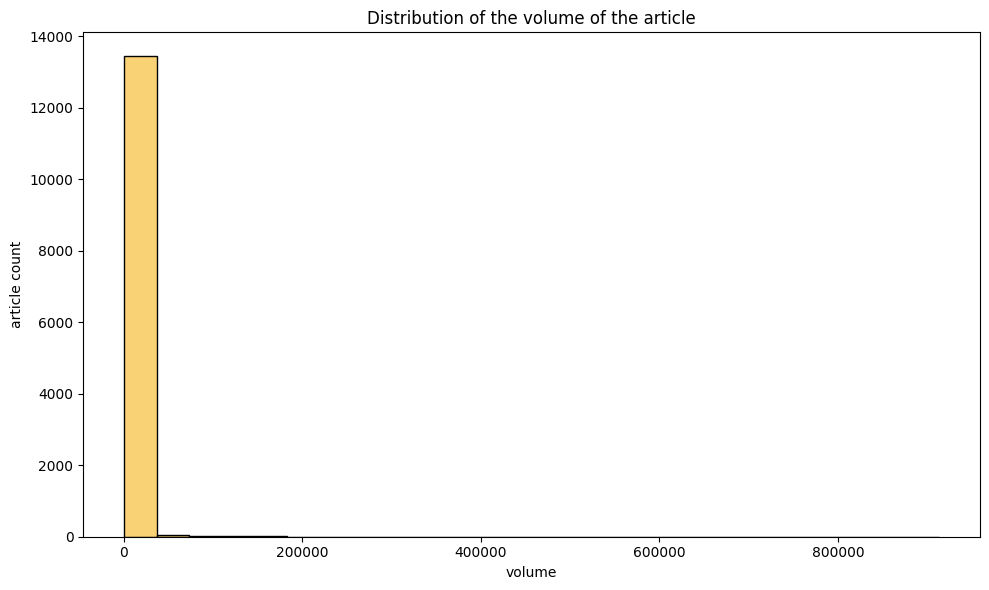

In [97]:
#plot the Volume of the article:
plt.figure(figsize= (10,6), dpi= 100)
sns.histplot(df_price_agg["volume"], bins = 25, color = '#f6c345')
plt.title("Distribution of the volume of the article")
plt.xlabel("volume")
plt.ylabel("article count")
plt.tight_layout()
plt.show()

Overall, looking at both data histogram, we found:
1. Some products with cheaper price: high volume
2. Some products with higher price:  low volume
=> It's make sense in real environment. So we decided to remain all of data and do not remove it 

# 3. MERGE 2 DATAFRAME: df_price and df_new_taoyin_features


In [100]:
#join the df_price (only volume and price column) with the df_taoyin_features -> create a new product feature that contains the price of each article, volume:
df_TY_new = df_new_taoyin_features.merge(df_price_agg, on = "articlenr", how = "left")
df_TY_new.head()

,articlenr,EF000001,EF000002,EF000003,EF000004,EF000005,EF000006,EF000007,EF000008,EF000010,...,EFFR0002,EFNL0014,EFUK0017,EFUK0019,ETIM,main_group,sub_group,gross_sale,volume,price
0,34581962,6.0,0.0,0.0,0.0,0.0,0.0,0.0,6.2,0.0,...,0.0,0.0,0.0,0.0,26.0,A,x1,NaN,NaN,NaN
1,35764300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,30.0,A,x2,NaN,NaN,NaN
2,35823358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,31.0,A,x3,NaN,NaN,NaN
3,28405226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,321.0,B,y1,NaN,NaN,NaN
4,35622440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,14.0,C,y2,NaN,NaN,NaN


In [101]:
#reduce the row with the price is NaN:
df_TY_new = df_TY_new[df_TY_new["price"].notnull()]

In [14]:
print(df_TY_new.shape)
df_TY_new.head()

(6107, 4031)


,articlenr,EF000001,EF000002,EF000003,EF000004,EF000005,EF000006,EF000007,EF000008,EF000010,...,EFFR0002,EFNL0014,EFUK0017,EFUK0019,ETIM,main_group,sub_group,volume,sum1,price
6,35785664,0.0,0.0,25.0,0.0,0.0,0.0,26.0,8.2,0.0,...,0.0,0.0,0.0,0.0,145.0,C,z1,90.0,93.62,1.04
38,35016688,0.0,0.0,182.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,16.0,C,y3,8.0,876.18,109.52
49,35700054,0.0,0.0,25.0,0.0,0.0,0.0,26.0,6.2,0.0,...,0.0,0.0,0.0,0.0,145.0,C,z1,958.0,1111.79,1.16
91,35832250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,82.0,C,u2,2.0,106.47,53.24
164,29641848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2334.0,...,0.0,0.0,0.0,0.0,319.0,B,y1,19.0,1890.42,99.50


## Test data:
- check null value by row: 
- check null value by column Cloumn nào cũng có giá trị hết, không có column nào đều là null value
- if null value is 100% -> remove the column 
- step 1: tìm các cột có nhiều giá trị NaN, chứa bao nhiêu % Nan
- step 2: PCA,.....
- Step 3: Công thức toán học, trung bị(Mean, Average)....

In [ ]:
#check columns from column 1 to 4025 in new , which columns have all the value in this columns is 0:
# Check columns from column 1 to 4025 in df_new_taoyin_features, which columns have all the values as 0
columns_all_zero = df_new_taoyin_features.iloc[:, 1:4026].columns[(df_new_taoyin_features.iloc[:, 1:4026] == 0).all()]
print(columns_all_zero)

Index([], dtype='object')


### DEVIDE PER GROUP - sample version PCA 

## TEST COMBINE GROUP FEATURES 


## TEST WITH GROUP E 
- RUN DROP THE COLUMNS CONTAIN NULL VALUE
- RUN WITH SMALL SCOPE

#### Group E with the old data set without price after 2022

In [ ]:
# Check columns from column 1 to 4025 in product_groupE, which columns have all the values as 0
columns_all_zero_E = product_groupE.iloc[:, 1:4026].columns[(product_groupE.iloc[:, 1:4026] == 0).all()]
print(columns_all_zero_E)


In [ ]:
#create the new df product E without the columns have all the value is 0:
p_E_new = product_groupE.drop(columns=columns_all_zero_E)
p_E_new.head()

,Articlenr,EF000001,EF000002,EF000003,EF000004,EF000005,EF000006,EF000007,EF000008,EF000010,...,EF025108,EF025109,EF025222,EF025340,EF025409,EF025560,EF026115,ETIM,main_group,sub_group
46,36405118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,500.0,1242.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,359.0,E,v2
183,36865158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,889.0,E,s3
266,36404602,0.0,0.0,7.0,0.0,0.0,0.0,48.0,1300.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,361.0,E,v2
307,32214958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,366.0,E,t3
489,36400140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,452.0,E,v2


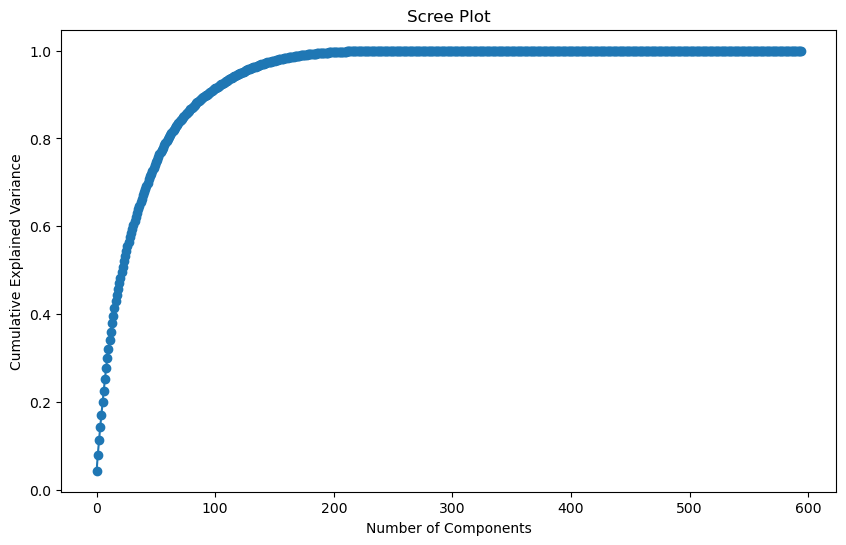

Number of components to retain 60% variance: 32


In [ ]:
#try to do PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Standardize the numeric data
# Exclude 'Articlenr' from the numeric columns
numeric_columns_E = p_E_new.select_dtypes(include=[np.number]).columns.difference(['Articlenr'])

#step 2: Standardize the numeric data
scaler_E = StandardScaler()
scaled_data_E = scaler_E.fit_transform(p_E_new[numeric_columns_E])

#step 3: check the components of the scaled data
# Step 3.1: Fit PCA
pca_E = PCA()
pca_E.fit(scaled_data_E)

# Step 3.2: Explained Variance
explained_variance_E = pca_E.explained_variance_ratio_
# Step 3.3: Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_E), marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()
# Step 3.4: Choose number of components
# Retain 60% of the variance
cumulative_variance_E = np.cumsum(explained_variance_E)
n_components_60_E = np.argmax(cumulative_variance_E >= 0.60) + 1
print(f'Number of components to retain 60% variance: {n_components_60_E}')




### Group E with new - dataframe TY_features_2022

In [22]:
#create group E from df_taoyin_features:
product_E2 = df_TY_new.loc[df_TY_new["main_group"] == "E"]
print(product_E2.shape)


(40, 4031)


In [ ]:
product_E2.head()

,articlenr,EF000001,EF000002,EF000003,EF000004,EF000005,EF000006,EF000007,EF000008,EF000010,...,EFFR0002,EFNL0014,EFUK0017,EFUK0019,ETIM,main_group,sub_group,volume,sum1,price
307,32214958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,366.0,E,t3,70.0,11636.25,166.23
4637,36404106,0.0,0.0,0.0,0.0,0.0,0.0,48.0,55.0,0.0,...,0.0,0.0,0.0,0.0,459.0,E,v2,5.0,618.61,123.72
5689,36404586,0.0,0.0,7.0,0.0,0.0,0.0,48.0,900.0,0.0,...,0.0,0.0,0.0,0.0,361.0,E,v2,1.0,441.28,441.28
12642,36404480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,20.0,E,v2,1.0,4.21,4.21
12918,36404582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,500.0,1.0,...,0.0,0.0,0.0,0.0,359.0,E,v2,5.0,769.83,153.97


In [19]:
# Check columns from column 1 to 4025 in product_E2, which columns have all the values as 0
columns_all_zero_E2 = product_E2.iloc[:, 1:4026].columns[(product_E2.iloc[:, 1:4026] == 0).all()]
print(columns_all_zero_E2)


Index(['EF000001', 'EF000002', 'EF000004', 'EF000005', 'EF000006', 'EF000012',
       'EF000013', 'EF000014', 'EF000015', 'EF000016',
       ...
       'EFDE0003', 'EFDE0005', 'EFDE0025', 'EFDE0031', 'EFDE0032', 'EFFR0001',
       'EFFR0002', 'EFNL0014', 'EFUK0017', 'EFUK0019'],
      dtype='object', length=3891)


In [21]:
#remove the columns have all the value is 0:Pr
product_E2_new= product_E2.drop(columns=columns_all_zero_E2)
print(product_E2_new.shape)
product_E2_new.head()


(40, 140)


,articlenr,EF000003,EF000007,EF000008,EF000010,EF000025,EF000040,EF000041,EF000049,EF000076,...,EF024798,EF024836,EF025109,EF025340,ETIM,main_group,sub_group,volume,sum1,price
307,32214958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,366.0,E,t3,70.0,11636.25,166.23
4637,36404106,0.0,48.0,55.0,0.0,0.0,55.0,0.0,22.0,0.0,...,1.0,0.0,0.0,0.0,459.0,E,v2,5.0,618.61,123.72
5689,36404586,7.0,48.0,900.0,0.0,0.0,630.0,0.0,57.0,0.0,...,0.0,0.0,1.0,0.0,361.0,E,v2,1.0,441.28,441.28
12642,36404480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,20.0,E,v2,1.0,4.21,4.21
12918,36404582,0.0,0.0,500.0,1.0,0.0,0.0,1235.0,0.0,120.0,...,0.0,0.0,0.0,0.0,359.0,E,v2,5.0,769.83,153.97


In [ ]:
#transform the data set product_E2_new to the csv file:
product_E2_new.to_csv("product_E2_new.csv", index=False)
#change the directory to the file:
import os
os.chdir("C:\\Users\\TechCare\\OneDrive - HvA\\Master - Block 1\\Business Statistics\\Team assignment") #change the directory to the file, chdir is function to change directory

Doing PCA with product_E2_new


In [3]:
#improt the csv file:
product_E2_new = pd.read_csv("product_E2_new.csv")

In [4]:
#data type of the columns in product_E2_new:
data_type_E2 = product_E2_new.dtypes
print(data_type_E2)

articlenr       int64
EF000003      float64
EF000007      float64
EF000008      float64
EF000010      float64
               ...   
main_group     object
sub_group      object
volume        float64
sum1          float64
price         float64
Length: 140, dtype: object


In [5]:
#change the datatype of the columns articlenr to object:
product_E2_new["articlenr"] = product_E2_new["articlenr"].astype("object")

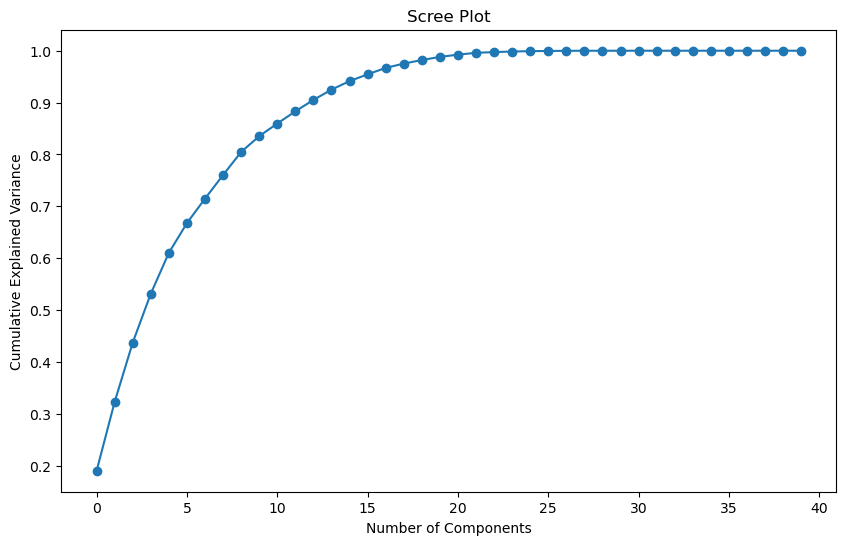

Number of components to retain 70% variance: 7


In [7]:
#step 1: Standardize the numeric data
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Exclude 'volumn', 'price', and 'sum1' from the numeric columns
numer_columns_E2 = product_E2_new.select_dtypes(include=[np.number]).columns.difference(['volume', 'price', 'sum1'])

#step 2: Standardize the numeric data
scaler_E2 = StandardScaler()
scaled_data_E2 = scaler_E2.fit_transform(product_E2_new[numer_columns_E2])

#step 3: check the components of the scaled data
# Step 3.1: Fit PCA
pca_E2 = PCA()
pca_E2.fit(scaled_data_E2)

# Step 3.2: Explained Variance
explained_variance_E2 = pca_E2.explained_variance_ratio_
# Step 3.3: Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_E2), marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

# Step 3.4: Choose number of components
# Retain 60% of the variance
cumulative_variance_E2 = np.cumsum(explained_variance_E2)
n_components_70_E2 = np.argmax(cumulative_variance_E2 >= 0.70) + 1
print(f'Number of components to retain 70% variance: {n_components_70_E2}')


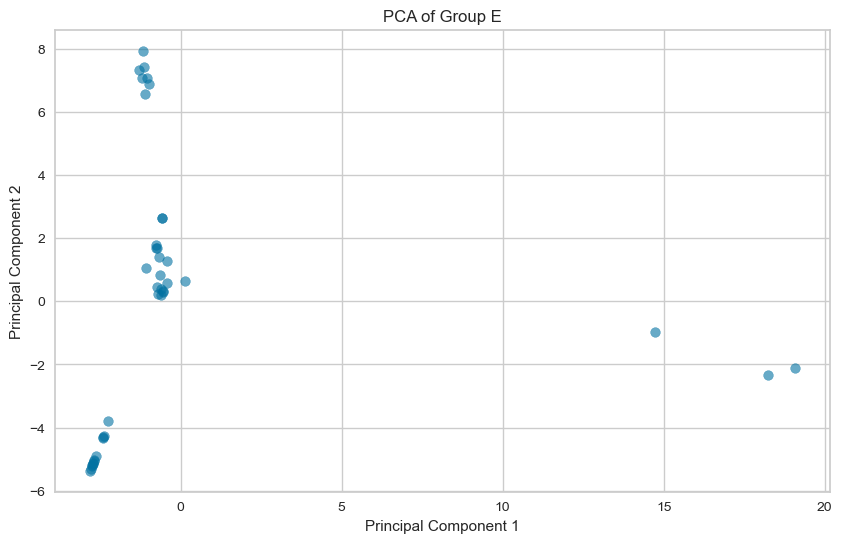

In [17]:
# Step 4: Apply PCA
pca_E2 = PCA(n_components=n_components_70_E2)
principal_components_E2 = pca_E2.fit_transform(scaled_data_E2)

# Step 5: Create a DataFrame with the principal components
pca_df_E2 = pd.DataFrame(data=principal_components_E2, 
                        columns=[f'PC{i+1}' for i in range(n_components_70_E2)])

# Ensure the columns exist and do not contain null values
required_columns = ["articlenr", "volume", "price", "sum1"]
for col in required_columns:
    if col not in product_E2_new.columns:
        raise ValueError(f"Column '{col}' not found in product_E2_new DataFrame")
    if product_E2_new[col].isnull().any():
        raise ValueError(f"Column '{col}' contains null values")

# Add the columns to the PCA DataFrame
pca_df_E2["articlenr"] = product_E2_new["articlenr"].values
pca_df_E2["volume"] = product_E2_new["volume"].values
pca_df_E2["price"] = product_E2_new["price"].values
pca_df_E2["sum1"] = product_E2_new["sum1"].values

# Step 6: plot the PCA result
plt.figure(figsize=(10, 6))
plt.scatter(pca_df_E2['PC1'], pca_df_E2['PC2'], alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Group E')
plt.show()

In [9]:
#make a table with comparing the explained variance and the cumulative variance:
explained_variance_E2 = pca_E2.explained_variance_ratio_ # Explained variance of each principal component
cumulative_variance_E2 = np.cumsum(explained_variance_E2) # Cumulative explained variance
variance_df_E2 = pd.DataFrame({'Explained Variance': explained_variance_E2, 'Cumulative Variance': cumulative_variance_E2})
variance_df_E2.index = variance_df_E2.index + 1
variance_df_E2.index.name = 'Principal Component'
variance_df_E2.head(7)

,Explained Variance,Cumulative Variance
Principal Component,,
1,0.190087,0.190087
2,0.132936,0.323022
3,0.114283,0.437305
4,0.094346,0.531651
5,0.078740,0.610392
6,0.057253,0.667644
7,0.047153,0.714797


In [18]:
pca_df_E2.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,articlenr,volume,price,sum1
0,-0.727940,0.442016,0.932222,1.111993,2.132721,7.950966,10.794453,32214958,70.0,166.23,11636.25
1,19.072515,-2.111784,-1.634843,-0.322142,-0.838322,-0.931008,1.875038,36404106,5.0,123.72,618.61
2,-1.117322,6.574390,-3.478000,-1.302123,-1.903847,-1.041845,0.244905,36404586,1.0,441.28,441.28
3,-0.686374,0.243546,0.457984,0.808354,1.066710,2.724525,0.591821,36404480,1.0,4.21,4.21
4,-2.383450,-4.254590,-1.180649,-0.770246,-0.860787,-0.668864,-0.028885,36404582,5.0,153.97,769.83


### Cluster analysis - find the component feature with:
1. Hight features
2. Medium features
3. Low features

K - means

In [ ]:
# Install yellowbrick package
%pip install yellowbrick

   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   -------- ------------------------------ 61.4/282.6 kB 812.7 kB/s eta 0:00:01
   ---------------------------------------  276.5/282.6 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 282.6/282.6 kB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [41]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

c:\Users\TechCare\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\TechCare\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\TechCare\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\TechCare\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory le

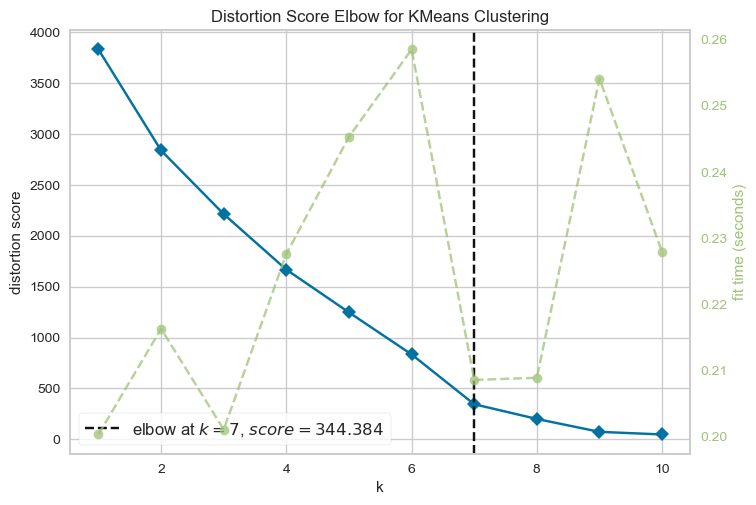

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [42]:
#model KMeans:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 11))

#plot
X_E2 = pca_df_E2[["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7"]]

visualizer.fit(X_E2)
visualizer.show()


Look at the graph, we use k=6 

In [43]:
k = 6

model = KMeans(n_clusters=k , 
               init=   'k-means++',
               random_state= 1)

model.fit(X_E2)

c:\Users\TechCare\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=6, random_state=1)

In [44]:
pca_df_E2["cluster_product"] = model.predict(X_E2)


In [45]:
pca_df_E2.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,articlenr,volume,price,sum1,cluster,cluster_product
0,-0.727940,0.442016,0.932222,1.111993,2.132721,7.950966,10.794453,32214958,70.0,166.23,11636.25,0,0
1,19.072515,-2.111784,-1.634843,-0.322142,-0.838322,-0.931008,1.875038,36404106,5.0,123.72,618.61,2,2
2,-1.117322,6.574390,-3.478000,-1.302123,-1.903847,-1.041845,0.244905,36404586,1.0,441.28,441.28,1,1
3,-0.686374,0.243546,0.457984,0.808354,1.066710,2.724525,0.591821,36404480,1.0,4.21,4.21,0,0
4,-2.383450,-4.254590,-1.180649,-0.770246,-0.860787,-0.668864,-0.028885,36404582,5.0,153.97,769.83,3,3


In [53]:
#UNIQUE VALUES IN THE cluster and cluster_product
print(pca_df_E2["cluster_product"].unique())
print(pca_df_E2["cluster"].unique())

[0 2 1 3 4 5]
[0 2 1 3 4 5]


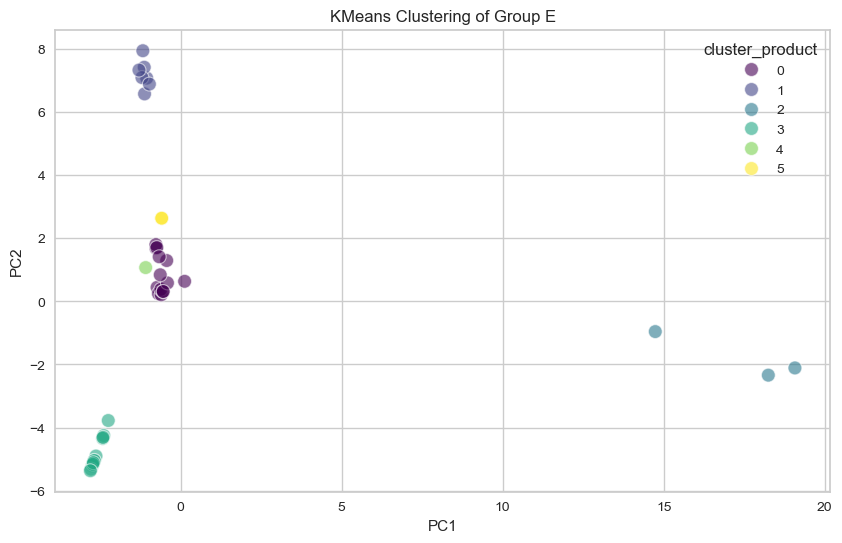

In [46]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster_product', data=pca_df_E2, palette='viridis', s=100, alpha=0.6)
plt.title('KMeans Clustering of Group E')
plt.show()


Gaussian Mixture Models 

In [47]:
# TODO: Apply your clustering algorithm of choice:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [48]:
#set a list of components in model:
n_GMMs = [2, 3, 4, 5, 6, 7, 8, 9, 10]

#run loops to get the silhouette score:

for n_GMM in n_GMMs:
    Clusterer = GaussianMixture(n_components = n_GMM, random_state= 1). fit(pca_df_E2)
    
    #predict the cluster for each data point
    preds = Clusterer.predict(pca_df_E2)
    
    #Find the cluster centres 
    centers = Clusterer.means_
    
    #calculate the mean silhouette score for the number of clusters chosen
    score = silhouette_score(pca_df_E2, preds)
    print(f"Silhouette score for {n_GMM} clusters: {score}")

c:\Users\TechCare\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette score for 2 clusters: 0.8999433710515703


c:\Users\TechCare\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette score for 3 clusters: 0.9143601413105639


c:\Users\TechCare\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette score for 4 clusters: 0.8063840140559968


c:\Users\TechCare\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette score for 5 clusters: 0.9472307910008443


c:\Users\TechCare\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette score for 6 clusters: 0.9099410628491524


c:\Users\TechCare\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\TechCare\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette score for 7 clusters: 0.8856285401043419
Silhouette score for 8 clusters: 0.8424201560692705


c:\Users\TechCare\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette score for 9 clusters: 0.8176566172768875
Silhouette score for 10 clusters: 0.772426877888899


c:\Users\TechCare\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette score for 5 clusters: 0.9472307910008443 - the highest silhouette => n_cluster = 5